# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [ ]:
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

# log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

In [ ]:
# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


### Fake Log Generator

In [ ]:
import random
# generate random log messages
supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


## Log Parser

In [37]:

from LogParser import parse_log_file, plot_ml_data, plot_gamma_data
from pprint import pprint

filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))
log_path = filenames[-1]
log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211020.155258\logfile_20211020.155258.log"
print(log_path)
score_dict, gamma_dict, stage_dict = parse_log_file(log_path)
pprint(score_dict)
pprint(gamma_dict)
pprint(stage_dict)

C:\Users\Admin\Github\autoliftout\liftout\log\run\20211020.155258\logfile_20211020.155258.log
2021-10-20 15:52:58 2021-10-20 15:52:58 Initialisation STARTED
2021-10-20 15:52:58 2021-10-20 15:52:58 Initialisation FINISHED
2021-10-20 15:53:09 2021-10-20 15:53:09 Setup STARTED
2021-10-20 16:01:04 2021-10-20 16:01:04 Setup FINISHED
Perform Milling: True
2021-10-20 16:02:01 2021-10-20 16:02:01 Milling STARTED
Perform Liftout: True
2021-10-20 16:18:15 2021-10-20 16:18:15 Liftout STARTED
Perform Landing: True
Perform Reset: True
2021-10-20 16:46:13 2021-10-20 16:46:13 Reset FINISHED
Perform Thinning: True
{'image_centre': {'False': 0, 'True': 0},
 'lamella_centre': {'False': 0, 'True': 0},
 'lamella_edge': {'False': 0, 'True': 0},
 'landing_post': {'False': 0, 'True': 0},
 'needle_tip': {'False': 0, 'True': 0}}
{'diff': [], 'gamma': []}
{'Finished': {'FINISHED': None, 'STARTED': None},
 'Initialisation': {'FINISHED': datetime.datetime(2021, 10, 20, 15, 52, 58),
                    'STARTED': 

## Machine Learning Evaluation

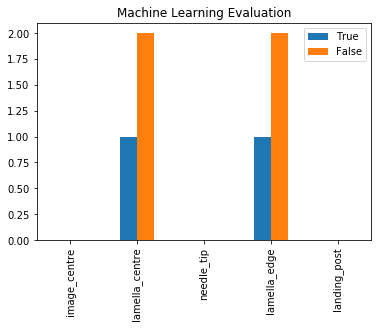

In [35]:
# eval
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: better plots and analysis

plot_ml_data(score_dict)


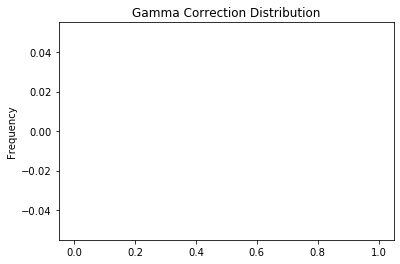

In [36]:
plot_gamma_data(gamma_dict)

## Gamma Correction Evaluation
evaluate the average gamma correction


In [ ]:

# pprint(gamma_dict)
# df_gamma = pd.DataFrame(gamma_dict)
# print(df_gamma)

# df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")

### Status Evaluation

In [39]:
# pprint(stage_dict)

for state in stage_dict.keys():
    
    if stage_dict[state]["FINISHED"] and stage_dict[state]["STARTED"]:
        state_duration = stage_dict[state]["FINISHED"] - stage_dict[state]["STARTED"]
        print(f"{state}: {state_duration}") 

Initialisation: 0:00:00
Setup: 0:07:55
